### Add scripts to the notebooks path

In [1]:
import os, sys

current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

scripts_path = os.path.join(parent_dir, 'scripts')

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

# Insert the path to the Scripts directory
sys.path.insert(0, scripts_path)

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))

d:\KifiyaAIM-Course\Week - 10\Brent-Oil-Market-Dynamics\notebooks


### Import Statements

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_theme()

### Data Collection

The data has already been provided and is present offline so the loading will be considered as the collection step

In [4]:
DATA_PATH = "../data/Brent_Oil_Prices.csv"
data = pd.read_csv(DATA_PATH)

### Exploratory Data Analysis

In [5]:
from scripts.exploratory_data_analyzer import EDAAnalyzer

analyzer = EDAAnalyzer(data=data)

1) Basic overview of the data

In [6]:
analyzer.basic_overview()

The data has a shape of: (9011, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB
None


From the result it can be seen that the date column is being treated as a string and not a date object so I will convert it to a date object

In [7]:
data['Date'] = pd.to_datetime(data['Date'])

2) Summary Statistics

In [8]:
analyzer.summary_statistics()

                                Date        Price
count                           9011  9011.000000
mean   2005-02-10 23:46:53.760958720    48.420782
min              1987-05-20 00:00:00     9.100000
25%              1996-03-20 12:00:00    19.050000
50%              2005-02-02 00:00:00    38.570000
75%              2014-01-09 12:00:00    70.090000
max              2022-11-14 00:00:00   143.950000
std                              NaN    32.860110


***Observations:***

- The data starts of on **1987-05-20** and continues upto **2022-11-14** which comes to 35+ years of data.
- The oil price shows a standard deviation of 32.86$ which is big but considering it is over a period of 35+ years it isn't that exagurated

3) Outlire detection

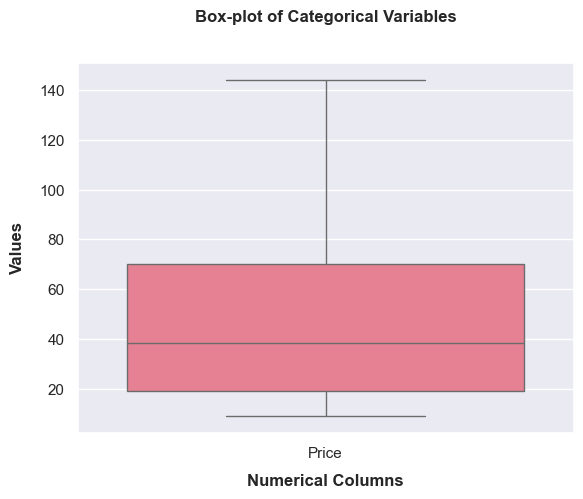

In [9]:
analyzer.outlire_detection()

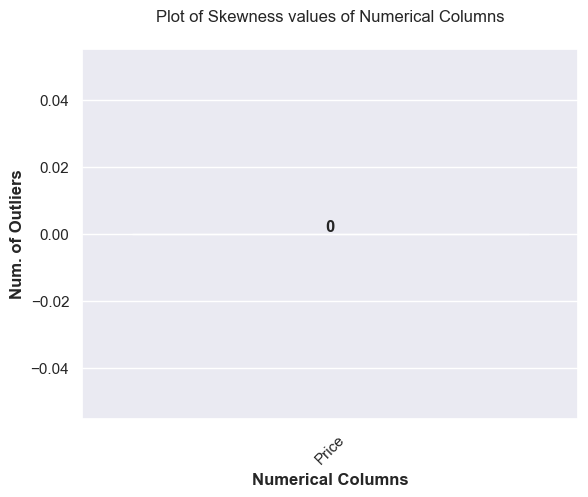

In [10]:
analyzer.count_outliers()

***Observation:*** from the box plot it's clear that there aren't any outlires present for the price column. This means that the price isn't that much fluctuating.


4) Price Distribution analysis

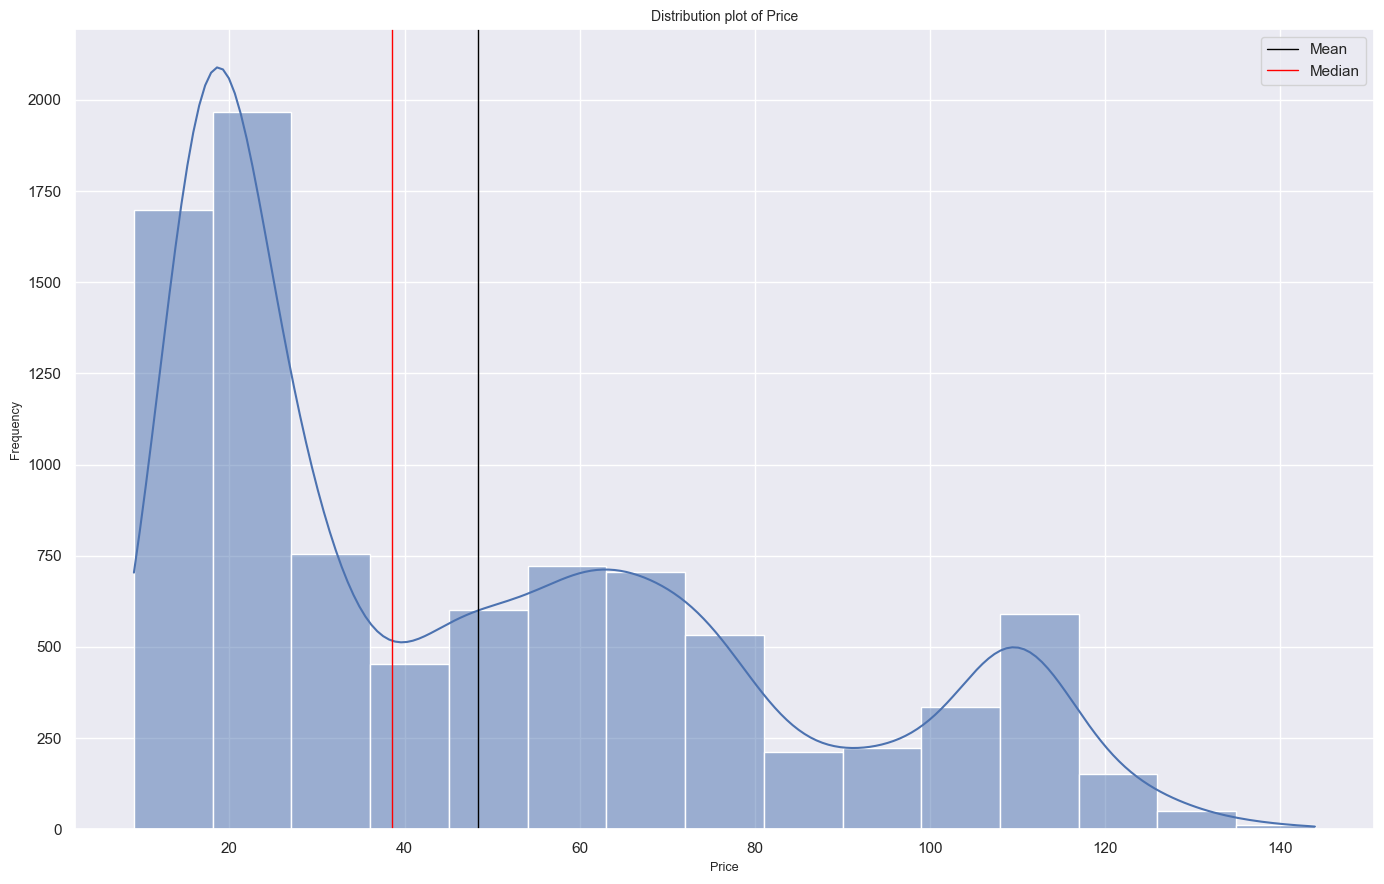

In [11]:
analyzer.numerical_distribution()

***Observation:*** the distribution of oil prices over those 35+ shows that it is a right skewed distribution. This tells me that for the majority of those 35+ years brent oil prices were in the range of 20$ - 40$ and for small prediods of times it hit highs of upto 140$. The average hovers at aorund 54$ as a result of that. 

### Event analysis

The aim of this section is to attach meaning to the dates. This means collecting different events that happened in a given year, at least major ones, and then using that to further understand how events affect the price of Brent oil

1) Define important historical events from 1987 to 2022

In [12]:
historical_events = {
    "Black Monday (1987)": {"start": "1987-10-19", "end": "1987-10-19", "category": "Economic Crises"},
    "Fall of Berlin Wall (1989)": {"start": "1989-11-09", "end": "1989-11-09", "category": "Geopolitical Conflicts"},
    "Gulf War (1990-1991)": {"start": "1990-08-02", "end": "1991-02-28", "category": "Geopolitical Conflicts"},
    "Dot-com Bubble Burst (2000-2002)": {"start": "2000-03-10", "end": "2002-10-09", "category": "Economic Crises"},
    "September 11 Attacks (2001)": {"start": "2001-09-11", "end": "2001-09-11", "category": "Geopolitical Conflicts"},
    "2003 Invasion of Iraq": {"start": "2003-03-20", "end": "2011-12-18", "category": "Geopolitical Conflicts"},
    "Global Financial Crisis (2008)": {"start": "2008-09-15", "end": "2009-07-01", "category": "Economic Crises"},
    "Arab Spring (2010-2012)": {"start": "2010-12-18", "end": "2012-12-18", "category": "Geopolitical Conflicts"},
    "U.S. Shale Oil Boom (2010s)": {"start": "2010-01-01", "end": "2019-12-31", "category": "Technological Advances"},
    "Libyan Civil War (2011)": {"start": "2011-02-15", "end": "2011-10-23", "category": "Geopolitical Conflicts"},
    "European Sovereign Debt Crisis (2010-2014)": {"start": "2010-01-01", "end": "2014-12-31", "category": "Economic Crises"},
    "OPEC Production Cuts (2016-2017)": {"start": "2016-11-30", "end": "2017-06-30", "category": "OPEC Policies"},
    "Iran Nuclear Deal (2015)": {"start": "2015-07-14", "end": "2018-05-07", "category": "OPEC Policies"},
    "Brexit Referendum (2016)": {"start": "2016-06-23", "end": "2016-06-23", "category": "Geopolitical Conflicts"},
    "U.S.-China Trade War (2018-2020)": {"start": "2018-01-01", "end": "2020-01-15", "category": "Geopolitical Conflicts"},
    "COVID-19 Pandemic (2020)": {"start": "2020-03-11", "end": "2022-09-30", "category": "Economic Crises"},
    "OPEC+ Response to COVID-19 (2020)": {"start": "2020-04-09", "end": "2020-12-31", "category": "OPEC Policies"},
    "Global Economic Recovery (2021-2022)": {"start": "2021-01-01", "end": "2022-09-30", "category": "Economic Crises"},
    "Russia-Ukraine Conflict (2022)": {"start": "2022-02-24", "end": "2022-09-30", "category": "Geopolitical Conflicts"},
}

In [13]:
# Convert the events dictionary to a DataFrame
historical_data = pd.DataFrame.from_dict(historical_events, orient='index')
historical_data.reset_index(inplace=True)
historical_data.columns = ['Event', 'Start', 'End', 'Category']

# Convert Start and End to datetime
historical_data['Start'] = pd.to_datetime(historical_data['Start'])
historical_data['End'] = pd.to_datetime(historical_data['End'])

2) Merge the data with the historical events

In [14]:
merged_data = analyzer.merge_event(events_data=historical_data)